<h1><center>GRMDS Project - Responsible Investing</center><h1>

<center><img width=40% src="https://github.com/girishksahu/RMDS_Project_Responsible_Investing/blob/SMART_AI_Learning/image/responsible-investing.jpg?raw=true"></center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Importing Libraries**](#Section3)<br>
  - **3.1** [**Version Check**](#Section31)
  - **3.2** [**Importing Libraries**](#Section32)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Data Pre-Processing**](#Section52)<br>

**6.** [**Data Post-Processing**](#Section7)<br>
  - **6.1** [**Data Encoding**](#Section71)<br> 
  - **6.2** [**Data Preparation**](#Section72)<br>


**7.** [**Model Development & Evaluation**](#Section8)<br>
**8.** [**Summary**](#Section9)<br>


---
<a name = Section1></a>
# **1. Introduction**
---

- Your client for this project is a Data Science Solution Provider.

   
**<h3>Current Scenario:</h3>**

- Need to create a dashboard for Responsible Investing.

---
<a name = Section2></a>
# **2. Problem Statement**
---

- In recent years, data science has served as an indispensable tool when taking into consideration investment decisions. With a growing awareness of corporate social and environmental accountability, potential investors can harness the power of data to enact responsible investing. 

<a name = Section21></a>
### **Your Role**

- You are given a dataset of Funds and their sustainability rating.  We have to collect data sets and create a dashboard that can help potential investors to review the social and environmental impacts of companies in which they might invest. 

- Our task is to build a classification model using the dataset.

     
- We need to build the best possible model.

<a name = Section21></a>
### **Project Deliverables**
- Deliverable: **Predict whether Fund is considered a Responsible Investing**

- Machine Learning Task: **Multi Classification.**

- Target Variable: **MorningStar Sustainanbility Rating (1,2,3,4,5)**
- Win Condition: **N/A (best possible model)**

<a name = Section21></a>
### **Evaluation Metric**

- The model evaluation will be based on the Accuracy score.

<center><img src="https://github.com/girishksahu/RMDS_Project_Responsible_Investing/blob/SMART_AI_Learning/image/ESG-Overview.jpg?raw=true"></center>

---
<a name = Section3></a>
# **3. Importing Libraries**
---

<a name = Section31></a>
### **3.1 Version Check**

In [1]:
from platform import python_version

# Printing version of Python to ensure correct version is used for this project
print("python version", python_version())
#!pip list
#!pip show


python version 3.8.5


<a name = Section32></a>
### **3.2 Importing Libraries**

In [2]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import randint as sp_randint                       # For initializing random integer values
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
import sklearn.metrics
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # To scaled data with mean 0 and variance 1
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV              # To find best hyperparamter setting for the algorithm
from sklearn.metrics import classification_report                   # To generate classification report
from sklearn.metrics import plot_confusion_matrix                   # To plot confusion matrix
#import pydotplus                                                    # To generate pydot file
from IPython.display import Image                                   # To generate image using pydot file
#-------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model  
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
from sklearn.metrics import plot_roc_curve
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LogisticRegression                 # To create the Logistic Regression Model
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

#Printing version of few key libraries to ensure correct once are used
print ("pandas version", pd.__version__)
print ("numpy version", np.__version__)
print ("seaborn version", sns.__version__)
print ("sklearn version", sklearn.__version__)

pandas version 1.1.3
numpy version 1.19.2
seaborn version 0.11.0
sklearn version 0.24.2


---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- The **dataset** consists of all the necessary information about the Funds like Name, Ticker, Morningstar sustainability rating, Yield, Morningstar category, etc.


| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 6003 | 29 | 1.3+ MB | 

<br>

| ID | Feature Name | Description of the feature |
| :-- | :--| :--| 
|01| **Name**   | Name of the Fund |
|02| **Ticker**      | An abbreviation of the fund's name|
|03| **Morningstar sustainability rating**        | The rating of the sustainability from the Morningstar|
|04| **Yield**          | The income return of a mutual fund|
|05| **Morningstar category**      | Fund category by location size and type |
|06| **Portfolio sustainability score**           | Financial sustainability score on this portfolio|
|07| **Portfolio environmental score**     | Environmental sustainability score on this portfolio|
|08| **Portfolio social score**        | Social sustainability score on this portfolio  |
|09| **Portfolio governance**          | Governance sustainability score on this portfolio      |
|10| **Sustainable investment by prospectus**         |Binary value claimed as sustainable investment or not  |
|11| **Sustainable investment - ESG Fund**     | Binary value claimed as ESG fund or not   |
|12| **Sustainable investment - Impact Fund**     | 	Binary value claimed as Impact fund or not     |
|13| **Sustainable investment - Environmental Sector Fund**     | Binary value claimed as Environmental sector fund or not     |
|14| **Animal testing**     | Binary value if the fund is related to animal testing           |
|15| **%Alcohol**     | Percentage of the fund related to alcohol            |
|16| **%Fossil Fuels**     | Percentage of the fund related to fossil fuels       |
|17| **%Small Arms**     | Percentage of the fund related to small arms                         |
|18| **%Thermal Coal**     | Percentage of the fund related to thermal coal  |
|19| **%Tobacco**     | Percentage of the fund related to tobacco            |
|20| **YTD Return(%)**     | The amount of profit (or loss) realized by an investment since the first trading day of the current calendar year           |
|21| **1 Year Annualized(%)**     | the geometric average amount of money earned by an investment each year over a given time period |
|22| **3 Year Annualized(%)**     | 3-year annualized total return  |
|23| **5 Year Annualized(%)**     | 5-year annualized total return  |
|24| **10 Year Annualized(%)**     |10-year annualized total return |
|25| **Fund Size (Mil)**     | dollars size of the fund  |
|26| **Equity StyleBox**     | stylebox defined by Morningstar  |
|27| **Fixed Income StyleBox**     | stylebox defined by Morningstar  |
|28| **Average Market Cap (Mil)**     | The geometric mean of the market capitalizations of the stocks a fund owns |
|29| **Average Credit Quality**     |Average credit quality gives a snapshot of the portfolio's overall credit quality. It is an average of each bond's credit rating, adjusted for its relative weighting in the portfolio |

<br>

- Load Funds train dataset to be used for Training and Validation

In [3]:
# Load Churn_train.csv
df=pd.read_csv("https://raw.githubusercontent.com/girishksahu/RMDS_Project_Responsible_Investing/SMART_AI_Learning/dataset/funds.csv",thousands=',')

# Get the dimesions of data
print('Shape of the Training and Validation dataset:', df.shape)

# Output first 10 data rows
df.head(10)


Shape of the Training and Validation dataset: (6003, 29)


,Name,Ticker,Morningstar Sustainability Rating,Yield (%),Morningstar Category,Portfolio Sustainability Score,Portfolio Environmental Score,Portfolio Social Score,Portfolio Governance Score,Sustainable Investment by Prospectus,Sustainable Investment - ESG Fund,Sustainable Investment - Impact Fund,Sustainable Investment - Environmental Sector Fund,Animal Testing,% Alcohol,% Fossil Fuels,% Small Arms,% Thermal Coal,% Tobacco,YTD Return (%),1 Year Annualized (%),3 Years Annualized (%),5 Years Annualized (%),10 Years Annualized (%),Fund Size (Mil),Equity StyleBox,Fixed Income StyleBox,Average Market Cap (Mil),Average Credit Quality
0,AB Sustainable Intl Thematic C,AWPCX,3.0,0.00,Global Equity Large Cap,20.67,4.21,8.13,6.92,Yes,Yes,Yes,No,0,0.0,3.73,0.0,1.90,0.0,8.22,24.74,19.32,12.27,7.50,941.47,Large Growth,NaN,32187.09,BBB
1,AB Sustainable Thematic Credit A,STHAX,5.0,NaN,US Fixed Income,21.27,3.39,8.11,6.78,Yes,Yes,Yes,No,0,0.0,8.24,0.0,2.25,0.0,8.22,24.74,19.32,12.27,7.50,174.22,NaN,NaN,32187.09,BBB
2,AB Sustainable Thematic Credit Advisor,STHYX,5.0,NaN,US Fixed Income,21.27,3.39,8.11,6.78,Yes,Yes,Yes,No,0,0.0,8.24,0.0,2.25,0.0,8.22,24.74,19.32,12.27,7.50,174.22,NaN,NaN,32187.09,BBB
3,Aberdeen International Sust Ldrs A,BJBIX,3.0,0.54,Global Equity Large Cap,20.99,3.31,8.61,6.60,Yes,Yes,No,No,0,0.0,2.33,0.0,2.34,0.0,11.74,34.20,16.19,11.93,6.09,146.06,Large Growth,NaN,36331.08,BBB
4,Aberdeen International Sust Ldrs I,JIEIX,3.0,0.83,Global Equity Large Cap,20.99,3.31,8.61,6.60,Yes,Yes,No,No,0,0.0,2.33,0.0,2.34,0.0,11.99,34.56,16.49,12.20,6.36,146.06,Large Growth,NaN,36331.08,BBB
5,Aberdeen US Sust Ldrs Smlr Coms A,MLSAX,1.0,0.00,US Equity Large Cap Growth,25.46,2.49,4.20,3.03,Yes,Yes,No,No,0,0.0,1.38,0.0,0.00,0.0,28.06,53.27,26.72,19.31,10.61,21.34,Mid Growth,NaN,6832.72,BBB
6,Aberdeen US Sust Ldrs Smlr Coms C,MLSCX,1.0,0.00,US Equity Large Cap Growth,25.46,2.49,4.20,3.03,Yes,Yes,No,No,0,0.0,1.38,0.0,0.00,0.0,26.89,51.76,25.77,18.41,9.82,21.34,Mid Growth,NaN,6832.72,BBB
7,Aberdeen US Sust Ldrs Smlr Coms Instl,GGUIX,1.0,0.00,US Equity Large Cap Growth,25.46,2.49,4.20,3.03,Yes,Yes,No,No,0,0.0,1.38,0.0,0.00,0.0,28.39,53.85,27.15,19.73,10.98,21.34,Mid Growth,NaN,6832.72,BBB
8,Aberdeen US Sust Ldrs Smlr Coms InstlSvc,AELSX,1.0,0.00,US Equity Large Cap Growth,25.46,2.49,4.20,3.03,Yes,Yes,No,No,0,0.0,1.38,0.0,0.00,0.0,28.21,53.56,26.96,19.54,10.76,21.34,Mid Growth,NaN,6832.72,BBB
9,Aberdeen US Sust Ldrs Smlr Coms R,GLSRX,1.0,0.00,US Equity Large Cap Growth,25.46,2.49,4.20,3.03,Yes,Yes,No,No,0,0.0,1.38,0.0,0.00,0.0,27.54,52.76,26.37,18.94,10.22,21.34,Mid Growth,NaN,6832.72,BBB


In [4]:
# Check for any missing values
any(df.isna().sum())

True

In [5]:
#check if any duplicate row
any(df.duplicated())

False

<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [6]:
#Basic statistical details for numeric variables
df.describe(include=[np.float64]).transpose()

,count,mean,std,min,25%,50%,75%,max
Morningstar Sustainability Rating,5993.0,3.506257,0.722056,1.00,3.000,3.00,4.000,5.00
Yield (%),5910.0,0.958667,1.266840,0.00,0.030,0.67,1.380,34.08
Portfolio Sustainability Score,5993.0,22.367559,2.868454,10.38,20.770,22.27,23.530,35.20
Portfolio Environmental Score,5993.0,3.731320,1.522058,0.00,2.980,3.75,4.210,14.04
Portfolio Social Score,5993.0,8.554747,2.264916,0.00,8.160,9.14,9.850,14.53
Portfolio Governance Score,5991.0,6.489062,1.584564,0.00,6.300,7.01,7.330,11.20
% Alcohol,6003.0,0.722409,1.436546,0.00,0.000,0.08,0.900,19.97
% Fossil Fuels,6003.0,5.893253,9.783290,0.00,1.155,4.82,7.010,100.69
% Small Arms,6003.0,0.612870,0.959304,0.00,0.000,0.17,0.870,7.91
% Thermal Coal,6003.0,1.059207,2.722055,0.00,0.000,0.45,1.305,63.91


In [7]:
#Basic statistical details for numeric variables
df.describe(include=[np.int64]).transpose()

,count,mean,std,min,25%,50%,75%,max
Animal Testing,6003.0,0.01416,0.118158,0.0,0.0,0.0,0.0,1.0


**Observations:**
- Total count for all numeric variables is not same as 6003 which confirms that there are missing values.

In [8]:
#Basic statistical details for categorical variables
df.describe(include=[np.object]).transpose()

,count,unique,top,freq
Name,6003,5677,Fidelity Advisor Freedom������������������,30
Ticker,6002,6002,HDGSX,1
Morningstar Category,6001,47,Global Equity Large Cap,730
Sustainable Investment by Prospectus,6003,2,No,5184
Sustainable Investment - ESG Fund,6003,2,No,5203
Sustainable Investment - Impact Fund,6003,2,No,5614
Sustainable Investment - Environmental Sector Fund,5997,2,No,5962
Equity StyleBox,5405,9,Large Core,2294
Fixed Income StyleBox,1642,9,Medium Moderate,560
Average Credit Quality,6003,6,BB,1723


**Observations:**
- Total count for all categorical variables is not same as 6003 which confirms that there are missing values. 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6003 entries, 0 to 6002
Data columns (total 29 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Name                                                6003 non-null   object 
 1   Ticker                                              6002 non-null   object 
 2   Morningstar Sustainability Rating                   5993 non-null   float64
 3   Yield (%)                                           5910 non-null   float64
 4   Morningstar Category                                6001 non-null   object 
 5   Portfolio Sustainability Score                      5993 non-null   float64
 6   Portfolio Environmental Score                       5993 non-null   float64
 7   Portfolio Social Score                              5993 non-null   float64
 8   Portfolio Governance Score                          5991 non-null   float64
 9

In [10]:
# Columns list can be handy and useful for further steps
df.columns

Index(['Name', 'Ticker', 'Morningstar Sustainability Rating', 'Yield (%)',
       'Morningstar Category', 'Portfolio Sustainability Score',
       'Portfolio Environmental Score', 'Portfolio Social Score',
       'Portfolio Governance Score', 'Sustainable Investment by Prospectus',
       'Sustainable Investment - ESG Fund',
       'Sustainable Investment - Impact Fund',
       'Sustainable Investment - Environmental Sector Fund', 'Animal Testing',
       '% Alcohol', '% Fossil Fuels', '% Small Arms', '% Thermal Coal',
       '% Tobacco', 'YTD Return (%)', '1 Year Annualized (%)',
       '3 Years Annualized (%)', '5 Years Annualized (%)',
       '10 Years Annualized (%)', 'Fund Size (Mil)', 'Equity StyleBox',
       'Fixed Income StyleBox', 'Average Market Cap (Mil)',
       'Average Credit Quality'],
      dtype='object')

<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of the features**.

In [11]:
# Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Name', 'Ticker', 'Morningstar Category', 'Sustainable Investment by Prospectus', 'Sustainable Investment - ESG Fund', 'Sustainable Investment - Impact Fund', 'Sustainable Investment - Environmental Sector Fund', 'Equity StyleBox', 'Fixed Income StyleBox', 'Average Credit Quality']


In [12]:
# Get list of numerical variables
s = (df.dtypes == 'float64')
numeric_cols = list(s[s].index)

print("Numeric variables Float:")
print(numeric_cols)

Numeric variables Float:
['Morningstar Sustainability Rating', 'Yield (%)', 'Portfolio Sustainability Score', 'Portfolio Environmental Score', 'Portfolio Social Score', 'Portfolio Governance Score', '% Alcohol', '% Fossil Fuels', '% Small Arms', '% Thermal Coal', '% Tobacco', 'YTD Return (%)', '1 Year Annualized (%)', '3 Years Annualized (%)', '5 Years Annualized (%)', '10 Years Annualized (%)', 'Fund Size (Mil)', 'Average Market Cap (Mil)']


In [13]:
# Get list of numerical variables
s = (df.dtypes == 'int64')
numeric_int_cols = list(s[s].index)

print("Numeric variables Int:")
print(numeric_int_cols)

Numeric variables Int:
['Animal Testing']


<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section52></a>
### **5.1 Data Pre-Processing**

- There are missing values and we need to pre process few features before EDA and Model Evaluation

In [14]:
df[df['Morningstar Sustainability Rating'].isnull()]

,Name,Ticker,Morningstar Sustainability Rating,Yield (%),Morningstar Category,Portfolio Sustainability Score,Portfolio Environmental Score,Portfolio Social Score,Portfolio Governance Score,Sustainable Investment by Prospectus,Sustainable Investment - ESG Fund,Sustainable Investment - Impact Fund,Sustainable Investment - Environmental Sector Fund,Animal Testing,% Alcohol,% Fossil Fuels,% Small Arms,% Thermal Coal,% Tobacco,YTD Return (%),1 Year Annualized (%),3 Years Annualized (%),5 Years Annualized (%),10 Years Annualized (%),Fund Size (Mil),Equity StyleBox,Fixed Income StyleBox,Average Market Cap (Mil),Average Credit Quality
331,Natixis Sustainable Future 2050 N,NSFKX,NaN,1.20,NaN,NaN,NaN,NaN,NaN,Yes,Yes,No,No,0,1.07,5.65,0.58,0.97,0.09,17.75,37.84,18.19,17.69,12.09,9.90,Large Core,NaN,53012.63,BB
453,Quantified Common Ground Investor,QCGDX,NaN,0.00,NaN,NaN,NaN,NaN,NaN,Yes,Yes,No,No,0,0.00,5.06,0.00,2.04,0.00,20.46,40.51,26.72,23.52,18.17,111.38,Mid Core,NaN,10107.80,A
454,RBC BlueBay Core Plus Bond A,RCPAX,NaN,NaN,US Fixed Income,NaN,NaN,NaN,NaN,Yes,Yes,No,No,0,0.00,5.06,0.00,2.04,0.00,20.46,40.51,26.72,23.52,18.17,49.75,NaN,NaN,10107.80,A
455,RBC BlueBay Core Plus Bond I,RCPIX,NaN,NaN,US Fixed Income,NaN,NaN,NaN,NaN,Yes,Yes,No,No,0,0.00,5.06,0.00,2.04,0.00,20.46,40.51,26.72,23.52,18.17,49.75,NaN,NaN,10107.80,A
456,RBC BlueBay Core Plus Bond R6,RCPRX,NaN,NaN,US Fixed Income,NaN,NaN,NaN,NaN,Yes,Yes,No,No,0,0.00,5.06,0.00,2.04,0.00,20.46,40.51,26.72,23.52,18.17,49.75,NaN,NaN,10107.80,A
457,RBC BlueBay High Yield Bond A,RHYAX,NaN,4.67,US Fixed Income,NaN,NaN,NaN,NaN,Yes,Yes,No,No,0,0.00,3.80,0.00,0.00,0.00,2.95,8.25,8.13,6.79,18.17,269.27,NaN,Low Limited,10107.80,B
458,RBC BlueBay High Yield Bond I,RGHYX,NaN,4.86,US Fixed Income,NaN,NaN,NaN,NaN,Yes,Yes,No,No,0,0.00,3.80,0.00,0.00,0.00,3.11,8.44,8.38,7.07,18.17,269.27,NaN,Low Limited,10107.80,B
459,RBC BlueBay Strategic Income A,RBIAX,NaN,NaN,US Fixed Income,NaN,NaN,NaN,NaN,Yes,Yes,No,No,0,0.00,3.80,0.00,0.00,0.00,3.11,8.44,8.38,7.07,18.17,49.98,NaN,NaN,10107.80,B
460,RBC BlueBay Strategic Income I,RBSIX,NaN,NaN,US Fixed Income,NaN,NaN,NaN,NaN,Yes,Yes,No,No,0,0.00,3.80,0.00,0.00,0.00,3.11,8.44,8.38,7.07,18.17,49.98,NaN,NaN,10107.80,B
461,RBC BlueBay Strategic Income R6,RBSRX,NaN,NaN,US Fixed Income,NaN,NaN,NaN,NaN,Yes,Yes,No,No,0,0.00,3.80,0.00,0.00,0.00,3.11,8.44,8.38,7.07,18.17,49.98,NaN,NaN,10107.80,B


In [15]:
df=df.drop(df[df['Morningstar Category'].isnull()].index)

In [16]:
df=df.drop(df[df['Ticker'].isnull()].index)

In [17]:
df=df.drop(df[df['Morningstar Sustainability Rating'].isnull()].index)

In [18]:
df['Portfolio Governance Score'] = df['Portfolio Governance Score'].fillna(0)
df['Portfolio Sustainability Score'] = df['Portfolio Sustainability Score'].fillna(0)
df['Portfolio Environmental  Score'] = df['Portfolio Environmental Score'].fillna(0)

df['Yield (%)'] = df['Yield (%)'].fillna(0)
df['10 Years Annualized (%)'] = df['10 Years Annualized (%)'].fillna(0)
df['Sustainable Investment - Environmental Sector Fund'] = df['Sustainable Investment - Environmental Sector Fund'].fillna('No')

<a name = Section7></a>

---
# **6. Data Post-Processing**
---



<a name = Section71></a>
### **6.1 Data Encoding**

- In this section, we will encode our categorical features as necessary and manipulate any column as necessary

In [19]:
df['Average Credit Quality'].value_counts()

BB     1722
BBB    1655
A      1429
AAA     504
AA      470
B       212
Name: Average Credit Quality, dtype: int64

In [20]:
df = df.rename(columns={"Average Credit Quality":"average_credit_quality"})
def a_c_q(g):
    if (g.average_credit_quality == 'AAA'): 
        return 1
    elif (g.average_credit_quality == 'AA'):
        return 2
    elif (g.average_credit_quality == 'B'):
        return 3
    elif (g.average_credit_quality == 'A'):
        return 4
    elif (g.average_credit_quality == 'BB'):
        return 5
    else:
        return 6
df['average_credit_quality_new']=df.apply(a_c_q,axis=1)

##### One Hot Encoding

In [21]:
def encoding_stat(df):
    stat=pd.get_dummies(df['Sustainable Investment - ESG Fund'],prefix='ESG')
    df=pd.concat([df,stat],axis=1)
    return df
df=encoding_stat(df)

In [22]:
def encoding_stat(df):
    stat=pd.get_dummies(df['Sustainable Investment - Impact Fund'],prefix='impact')
    df=pd.concat([df,stat],axis=1)
    return df
df=encoding_stat(df)

In [23]:
def encoding_stat(df):
    stat=pd.get_dummies(df['Sustainable Investment - Environmental Sector Fund'],prefix='env')
    df=pd.concat([df,stat],axis=1)
    return df
df=encoding_stat(df)

In [24]:
pip install sunbird

Note: you may need to restart the kernel to use updated packages.


In [25]:
df.columns

Index(['Name', 'Ticker', 'Morningstar Sustainability Rating', 'Yield (%)',
       'Morningstar Category', 'Portfolio Sustainability Score',
       'Portfolio Environmental Score', 'Portfolio Social Score',
       'Portfolio Governance Score', 'Sustainable Investment by Prospectus',
       'Sustainable Investment - ESG Fund',
       'Sustainable Investment - Impact Fund',
       'Sustainable Investment - Environmental Sector Fund', 'Animal Testing',
       '% Alcohol', '% Fossil Fuels', '% Small Arms', '% Thermal Coal',
       '% Tobacco', 'YTD Return (%)', '1 Year Annualized (%)',
       '3 Years Annualized (%)', '5 Years Annualized (%)',
       '10 Years Annualized (%)', 'Fund Size (Mil)', 'Equity StyleBox',
       'Fixed Income StyleBox', 'Average Market Cap (Mil)',
       'average_credit_quality', 'Portfolio Environmental  Score',
       'average_credit_quality_new', 'ESG_No', 'ESG_Yes', 'impact_No',
       'impact_Yes', 'env_No', 'env_Yes'],
      dtype='object')

In [26]:
from sunbird.categorical_encoding import frequency_encoding
frequency_encoding(df,'Morningstar Category')

###### Renaming Column Names 

In [27]:
df.rename(columns = {'Ticker':'ticker','YTD Return (%)':'ytd','% Alcohol':'Alcohol_%','% Tobacco':'tobacco_%','Fund Size (Mil)':'fund_size_mil','% Thermal Coal':'thermal_coal_%','% Small Arms':'small_arms_%','% Fossil Fuels':'fossil_fuels_%','Animal Testing':'animal_testing', 'Morningstar Sustainability Rating':'morningstar_sustainability_rating', 'Morningstar Category':'morningstar_category','Portfolio Sustainability Score':'portfolio_sustainability_score','Portfolio Environmental Score':'portfolio_E','Portfolio Social Score':'portfolio_SS','Portfolio Governance Score':'portfolio_GS','3 Years Annualized (%)':'3_yrs_annl_perct','5 Year Annualized (%)':'5_yrs_annl_perct','10 Year Annualized (%)':'10_yrs_annl_perct','1 Year Annualized (%)':'1_yrs_annl_perct','Average Market Cap (Mil)':'avg_market_cap'}, inplace = True)

In [28]:
X=df[['Yield (%)','morningstar_category', 'portfolio_sustainability_score',
       'portfolio_E', 'portfolio_SS',
       'portfolio_GS','animal_testing',
       'Alcohol_%', 'fossil_fuels_%', 'small_arms_%', 'thermal_coal_%',
       'tobacco_%', 'ytd', '1_yrs_annl_perct', '3_yrs_annl_perct',
       '5 Years Annualized (%)', '10 Years Annualized (%)', 'fund_size_mil',
        'avg_market_cap', 'average_credit_quality_new', 'ESG_No',
       'ESG_Yes', 'impact_No', 'impact_Yes', 'env_No', 'env_Yes', 'ESG_No',
       'ESG_Yes', 'impact_No', 'impact_Yes', 'env_No', 'env_Yes']]

In [29]:
y=df['morningstar_sustainability_rating']

In [30]:
y.shape

(5992,)

In [31]:
df=df.drop(df[df['morningstar_sustainability_rating'].isnull()].index)

<a name = Section72></a>
### **6.2 Data Preparation**

- Now we will **split** our **data** into **dependent** and **independent** variables for further development using holdout validation technique.

In [ ]:
df[df['portfolio_SS'].isnull()]

In [32]:
# Splitting data into training and testing sets with using Validation Test Data as 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Display the shape of training and testing data
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)
X_train.info()
#X_train.columns
X_train.head()

X_train shape:  (4494, 32)
y_train shape:  (4494,)
X_test shape:  (1498, 32)
y_test shape:  (1498,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4494 entries, 4663 to 870
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Yield (%)                       4494 non-null   float64
 1   morningstar_category            4494 non-null   int64  
 2   portfolio_sustainability_score  4494 non-null   float64
 3   portfolio_E                     4494 non-null   float64
 4   portfolio_SS                    4494 non-null   float64
 5   portfolio_GS                    4494 non-null   float64
 6   animal_testing                  4494 non-null   int64  
 7   Alcohol_%                       4494 non-null   float64
 8   fossil_fuels_%                  4494 non-null   float64
 9   small_arms_%                    4494 non-null   float64
 10  thermal_coal_%                  4494 non-null   float6

,Yield (%),morningstar_category,portfolio_sustainability_score,portfolio_E,portfolio_SS,portfolio_GS,animal_testing,Alcohol_%,fossil_fuels_%,small_arms_%,thermal_coal_%,tobacco_%,ytd,1_yrs_annl_perct,3_yrs_annl_perct,5 Years Annualized (%),10 Years Annualized (%),fund_size_mil,avg_market_cap,average_credit_quality_new,ESG_No,ESG_Yes,impact_No,impact_Yes,env_No,env_Yes,ESG_No,ESG_Yes,impact_No,impact_Yes,env_No,env_Yes
4663,1.84,180,22.73,3.78,8.71,6.62,0,0.58,4.11,0.40,1.17,0.56,3.93,13.94,9.44,7.10,6.10,211.53,33646.52,5,1,0,1,0,1,0,1,0,1,0,1,0
5117,1.06,546,21.68,4.07,9.03,7.31,0,1.76,7.72,0.77,1.42,0.33,15.60,35.76,16.32,13.27,11.26,3714.51,75846.09,5,1,0,1,0,1,0,1,0,1,0,1,0
5421,0.42,399,21.66,5.25,9.17,7.24,0,0.00,10.00,0.00,0.00,0.00,28.65,48.22,18.74,17.53,15.22,712.38,55530.92,5,1,0,1,0,1,0,1,0,1,0,1,0
2679,0.00,449,27.09,1.33,2.60,1.85,0,0.57,1.06,0.00,0.00,0.00,9.64,37.06,19.02,19.42,14.80,3017.35,4342.80,6,1,0,1,0,1,0,1,0,1,0,1,0
4958,1.21,341,22.20,3.78,10.10,7.45,0,1.25,5.68,0.71,1.20,0.31,11.19,26.90,14.10,10.85,9.12,974.41,88366.18,6,1,0,1,0,1,0,1,0,1,0,1,0


In [33]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

Text(0.5, 0, 'Feature Importance')

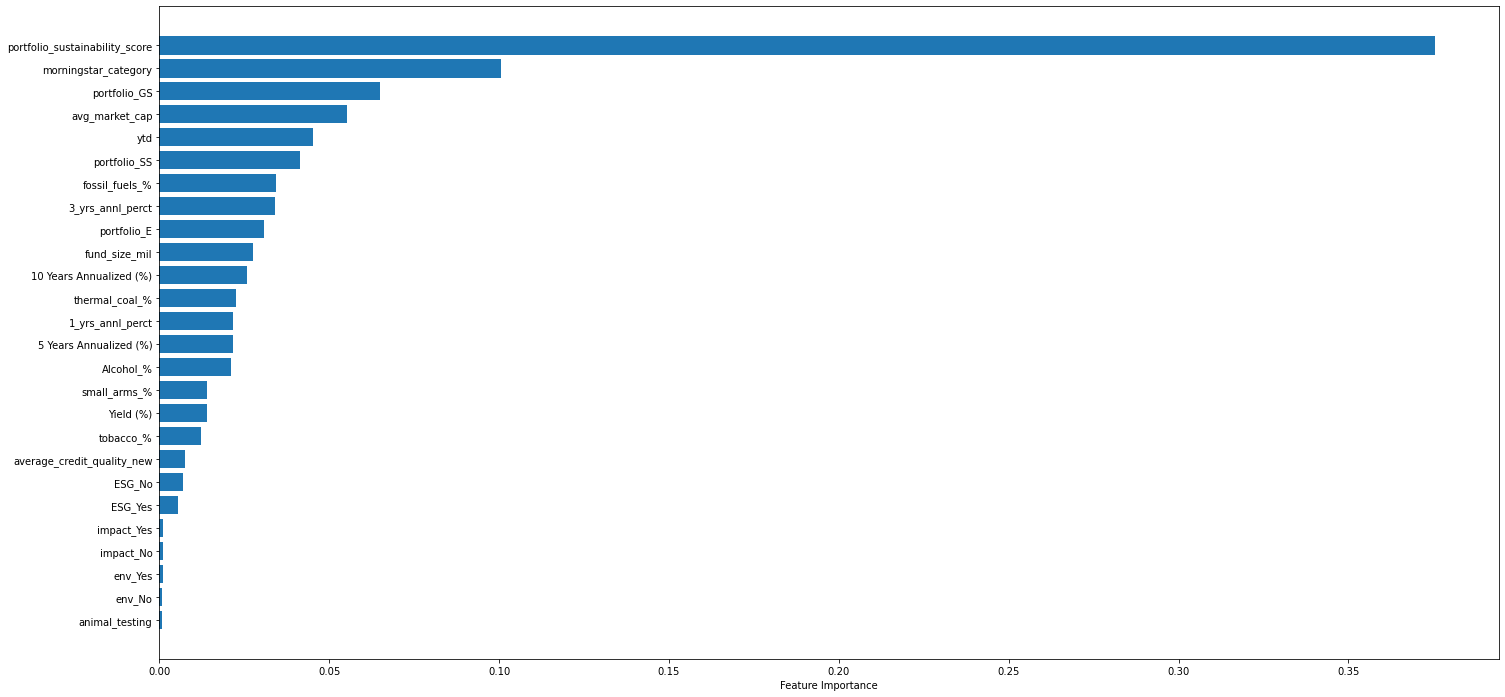

In [34]:
rf = RandomForestRegressor(n_estimators=150)
rf.fit(X_train, y_train)
sort = rf.feature_importances_.argsort()
fig=plt.figure(figsize=(24, 12))
#fig.font(size=20)
plt.barh(X.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

<a name = Section8></a>

---
# **7. Model Development & Evaluation**
---

- In this section we will **develop a Logistic Regression model**

- Then we will **analyze the results** obtained and **make our observations**.

- For **evaluation purpose** we will **focus** on **Accuracy Score** score as required by this project.

<a name = Section81></a>
### **7.1 Baseline Model Development & Evaluation**

- Here we will develop Logistic Regression classification model using default setting.

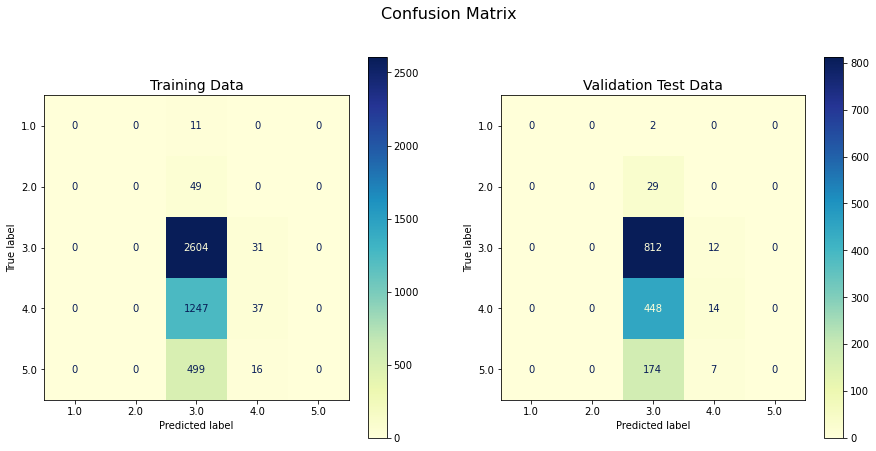

In [35]:
# Instantiate a Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

# Predicting training and testing labels
y_train_pred_count = logreg.predict(X_train)
y_test_pred_count = logreg.predict(X_test)

# Plotting confusion maxtrix of train and test data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
plot_confusion_matrix(estimator=logreg, X=X_train, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=logreg, X=X_test, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Training Data', size=14)
ax2.set_title(label='Validation Test Data', size=14)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

In [36]:
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_test_pred_count))
confusion_matrix.index = ['Actual 1.0','Actual 2.0','Actual 3.0','Actual 4.0','Actual 5.0']
confusion_matrix.columns = ['Predicted 1.0','Predicted 2.0','Predicted 3.0','Predicted 4.0','Predicted 5.0']
print(confusion_matrix)

            Predicted 1.0  Predicted 2.0  Predicted 3.0  Predicted 4.0  \
Actual 1.0              0              0              2              0   
Actual 2.0              0              0             29              0   
Actual 3.0              0              0            812             12   
Actual 4.0              0              0            448             14   
Actual 5.0              0              0            174              7   

            Predicted 5.0  
Actual 1.0              0  
Actual 2.0              0  
Actual 3.0              0  
Actual 4.0              0  
Actual 5.0              0  


In [37]:
print('Accuracy score for test validation data is:', accuracy_score(y_test,y_test_pred_count))

Accuracy score for test validation data is: 0.5514018691588785


In [38]:
# K Fold
kf = KFold(shuffle=True, n_splits=5)
cv_results_kfold = cross_val_score(logreg,X_train, y_train, cv=kf, scoring='accuracy')
print(cv_results_kfold)

# Stratified K fold

skf = StratifiedKFold(shuffle=True, n_splits=5)
cv_results_skfold = cross_val_score(logreg, X_train, y_train, cv=skf, scoring='accuracy')
print(cv_results_skfold)

[0.59510567 0.60845384 0.57953281 0.57063404 0.5701559 ]
[0.5862069  0.5839822  0.58175751 0.58509455 0.58908686]


In [39]:
train_report = classification_report(y_train, y_train_pred_count)
test_report = classification_report(y_test, y_test_pred_count)
print('                    Training Data Report          ')
print(train_report)
print('                    Test Validation Data Report           ')
print(test_report)

                    Training Data Report          
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        11
         2.0       0.00      0.00      0.00        49
         3.0       0.59      0.99      0.74      2635
         4.0       0.44      0.03      0.05      1284
         5.0       0.00      0.00      0.00       515

    accuracy                           0.59      4494
   macro avg       0.21      0.20      0.16      4494
weighted avg       0.47      0.59      0.45      4494

                    Test Validation Data Report           
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00        29
         3.0       0.55      0.99      0.71       824
         4.0       0.42      0.03      0.06       462
         5.0       0.00      0.00      0.00       181

    accuracy                           0.55      1498
   macro avg       0.

In [40]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.pipeline import Pipeline
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=10)
pipeDT = Pipeline(( 
("DT",DecisionTreeClassifier(random_state = 42, max_depth = 5)) ,    
))
pipeDT.fit(X_train,y_train)
print("Testing Accuracy")
print(pipeDT.score(X_test,y_test))
print("Training Accuracy")
print(pipeDT.score(X_train,y_train))
from sklearn.model_selection import cross_val_score
scoresknn = cross_val_score(pipeDT, X_train, y_train, cv=10,scoring='accuracy')
print()
print("Average Accuracy")
print(np.mean(scoresknn))

Testing Accuracy
0.74395329441201
Training Accuracy
0.7500521593991237

Average Accuracy
0.7460925539318024


In [42]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=10)
pipeRF = Pipeline(( 
("RF",RandomForestClassifier(random_state = 42, max_depth = 5)) ,    
))
pipeRF.fit(X_train,y_train)

print("Testing Accuracy")
print(pipeRF.score(X_test,y_test))
print("Training Accuracy")
print(pipeRF.score(X_train,y_train))
from sklearn.model_selection import cross_val_score
scoresknn = cross_val_score(pipeRF, X_train, y_train, cv=10,scoring='accuracy')
print()
print("Average Accuracy")
print(np.mean(scoresknn))

Testing Accuracy
0.7239366138448707
Training Accuracy
0.7321093261005633

Average Accuracy
0.7162547842727907


In [43]:
#With Pipeline
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import PowerTransformer,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=10)
pipe = Pipeline((
("sc",RobustScaler()),    
("knn",KNeighborsClassifier(n_neighbors=10)) ,    
))
pipe.fit(X_train,y_train)
print("Testing Accuracy")

print(pipe.score(X_test,y_test))
print("Training Accuracy")
print(pipe.score(X_train,y_train))
from sklearn.model_selection import cross_val_score
scoresknn = cross_val_score(pipe, X_train, y_train, cv=10,scoring='accuracy')
print()
print("Average Accuracy")
print(np.mean(scoresknn))

Testing Accuracy
0.7723102585487907
Training Accuracy
0.8453995409972878

Average Accuracy
0.7711273486430062


In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred=pipeRF.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         3
         2.0       1.00      0.33      0.50        18
         3.0       0.73      0.96      0.83       690
         4.0       0.64      0.41      0.50       354
         5.0       0.97      0.42      0.58       134

    accuracy                           0.72      1199
   macro avg       0.67      0.42      0.48      1199
weighted avg       0.73      0.72      0.70      1199



In [45]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred=pipe.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         3
         2.0       1.00      0.39      0.56        18
         3.0       0.81      0.93      0.86       690
         4.0       0.71      0.58      0.64       354
         5.0       0.69      0.55      0.61       134

    accuracy                           0.77      1199
   macro avg       0.64      0.49      0.53      1199
weighted avg       0.76      0.77      0.76      1199



## <b><u>Observation</b></u>:
<ul>
    <li>KNeighborsClassifier Accuracy:0.77</li>
    <li>DecisionTreeClassifier Accuracy:0.74</li>
    <li>RandomForestClassifier Accuracy:0.71</li>
    <li>Logistic Regression classification Accuracy:0.55</li>
</ul>
  

<a name = Section9></a>

---
# **8. Summary**
---

KNeighborsClassifier is giving the best Accuracy. Hence, after going through the pre-processing on unseen Test data we can use KNeighborsClassifier to predict the Morningstar Sustainability Rating which will help investors to take decision on Resposibily investing. 